In [1]:
%matplotlib inline

### image basic

In [2]:
import numpy as np

# create empty array for image
check = np.zeros((9, 9))
check[::2, 1::2] = 1
check[1::2, ::2] = 1

In [3]:
check.shape

(9, 9)

In [4]:
pixelcount = check.shape[0] * check.shape[1]
pixelcount

81

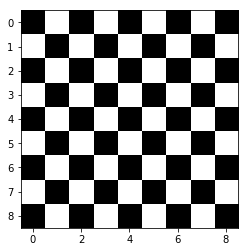

In [5]:
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest') 

### black and white image

In [6]:
from skimage import io
import skimage
import os

In [7]:
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)
camera.shape

(512, 512)

In [8]:
pixelcount = camera.shape[0] * camera.shape[1]
pixelcount

262144

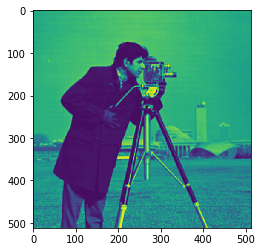

In [9]:
plt.imshow(camera)

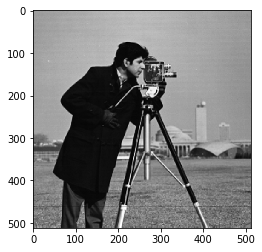

In [10]:
plt.imshow(camera, cmap='gray')

### color image

In [11]:
import scipy.misc
face = scipy.misc.face()
face.shape

(768, 1024, 3)

In [12]:
face.dtype

dtype('uint8')

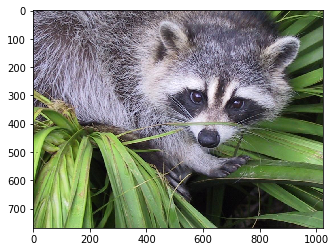

In [13]:
plt.imshow(face)

In [14]:
pixelcount = face.shape[0]*face.shape[1] # resolution
pixelcount

786432

In [ ]:
np.max(face, axis=(0,1)) # max rgb value

In [ ]:
np.mean(face, axis=(0,1)) # mean rgb value

In [ ]:
np.std(face, axis=(0,1)) # standard deviation

In [ ]:
np.var(face, axis=(0,1)) # variance of rgb value

### convert RGB to HSV

notes from https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html

In [15]:
from skimage import data
from skimage.color import rgb2hsv

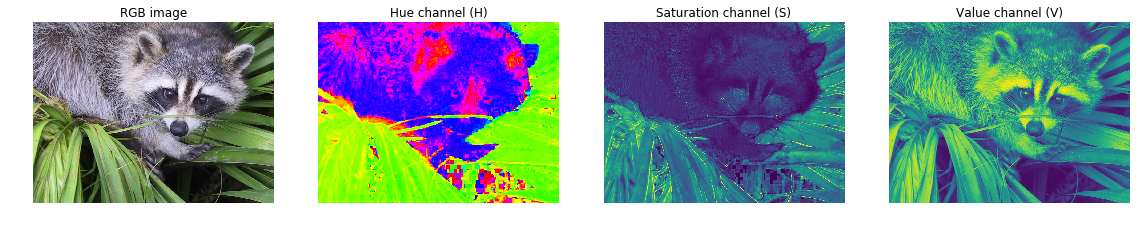

In [16]:
rgb_img = face#data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
saturation_img = hsv_img[:,:, 1]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 8))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel (H)")
ax1.axis('off')
ax2.imshow(saturation_img)
ax2.set_title("Saturation channel (S)")
ax2.axis('off')
ax3.imshow(value_img)
ax3.set_title("Value channel (V)")
ax3.axis('off')

fig.tight_layout()

In [17]:
np.max(hue_img)

0.9916666666666667

In [18]:
np.min(hue_img)

0.0

In [ ]:
mean_hue = np.mean(hue_img, axis=(0,1))
mean_hue

In [ ]:
mean_saturation = np.mean(saturation_img, axis=(0,1))
mean_saturation

In [ ]:
# mean_brightness = np.mean(value_img, axis=(0,1))
mean_brightness = np.mean(value_img)
mean_brightness

In [ ]:
var_brightness = np.var(value_img) # variance of brightness channel
var_brightness

In [ ]:
value_img.shape

### rgb -> grayscale conversion (optional) yields similar results to Value channel of HSV

In [ ]:
# rgb to grayscale
#    Y = 0.2125 R + 0.7154 G + 0.0721 B
# https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html

from skimage.color import rgb2gray

gray_img = rgb2gray(face)
plt.imshow(gray_img, cmap='gray')

In [ ]:
grayscale.shape # note x and y dimensions are reversed

In [ ]:
diff = value_img - gray_img
plt.imshow(diff, cmap="gray")

... this difference image just shows us that they gray image and value image are somewhat different. we will use the value image for our analysis

### calculating edges

In [ ]:
from scipy import ndimage

edges = ndimage.sobel(value_img)
plt.imshow(edges, cmap='gray')

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

hsv_img = rgb2hsv(face)
value_img = hsv_img[:, :, 2]

# edges = ndimage.sobel(value_img)
sobel_x = ndimage.sobel(value_img, axis=0, mode='constant')
sobel_y = ndimage.sobel(value_img, axis=1, mode='constant')
edge_image = np.hypot(sobel_x, sobel_y)

# accumulated sum of the edge image is close to "edge score"
print("edgesum photo", np.sum(edge_image))
# edges = cv2.Canny(painting, 32,255)

plt.imshow(edge_image, cmap='gray')

### edges on a painting

In [ ]:
painting = io.imread("https://images.rkd.nl/rkd/thumb/650x650/985b50b4-1378-78dd-52ce-1eee52771b4f.jpg")
plt.imshow(painting)

In [ ]:
hsv_img = rgb2hsv(painting)
value_img = hsv_img[:, :, 2]

# edges = ndimage.sobel(value_img)
sobel_x = ndimage.sobel(value_img, axis=0, mode='constant')
sobel_y = ndimage.sobel(value_img, axis=1, mode='constant')
edge_image = np.hypot(sobel_x, sobel_y)

# accumulated sum of the edge image is close to "edge score"
print("edgesum painting", np.sum(edge_image))

plt.imshow(edge_image, cmap='gray')